In [31]:
import numpy as np
from sklearn.metrics import log_loss, accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from tqdm import tqdm

In [14]:
def initialisation(n0,n1,n2):
    W1 = np.random.randn(n1,n0)
    b1 = np.zeros((n1,1))
    W2 = np.random.randn(n2,n1)
    b2 = np.zeros((n2,1))

    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters

In [15]:
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))
    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))

    activations = { "A1": A1, "A2": A2}

    return activations

In [16]:
def back_propagation(X,y,parameters,activations):
    m = y.shape[1]
    A1 = activations["A1"]
    A2 = activations["A2"]
    W2 = parameters["W2"]

    dZ2 = A2 - y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True) # conserve les dimensions avec keepdims=True pour ne pas avoir de problème de broadcast
    dZ1 = W2.T.dot(dZ2) * A1 * (1 - A1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)

    gradients = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return gradients


In [17]:
def update(gradients, parameters, learning_rate):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = gradients["dW1"]
    db1 = gradients["db1"]
    dW2 = gradients["dW2"]
    db2 = gradients["db2"]

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters

In [18]:
def predict(X, parameters):
    activations = forward_propagation(X, parameters)
    A2 = activations["A2"]
    return A2 >= 0.5

In [78]:
def artificial_nn(X_train, y_train, n1, num_iterations=10000, learning_rate=0.01):
    # initialisation W, b
    n0 = X_train.shape[0] # nombre de features (variables)
    n2 = y_train.shape[0] # nombre de neurones dans la couche de sortie
     # nombre de neurones dans la couche cachée
    parameters = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []

    for i in range(num_iterations):
        
        activations = forward_propagation(X_train, parameters)
        gradients = back_propagation(X_train, y_train, parameters, activations)
        parameters = update(gradients, parameters, learning_rate)

        if i % 10 == 0:
            train_loss.append(log_loss(y_train, activations["A2"]))
            y_pred = predict(X_train, parameters)
            acc = accuracy_score(y_train.flatten(), y_pred.flatten()) # les tableaux sont de dim n2,1 donc on flatten pour avoir un tableau de dim n2
            train_acc.append(acc)
        
    plt.figure(figsize=(14,6))

    plt.subplot(1,2,1)
    plt.plot(train_loss, label="train_loss")
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(train_acc, label="train_acc")
    plt.legend()
    plt.show()

    return parameters

dimensions de X: (2, 100)
dimensions de y: (1, 100)


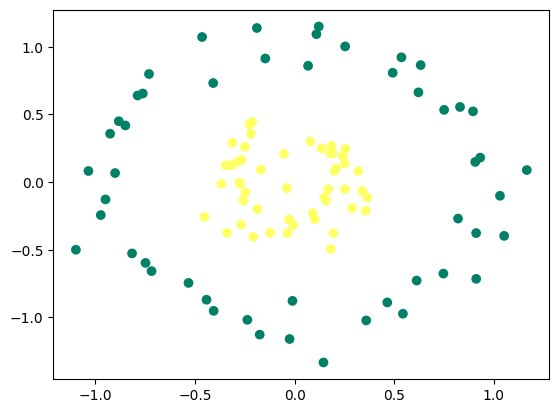

In [73]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

100%|██████████| 1000/1000 [00:01<00:00, 723.13it/s]


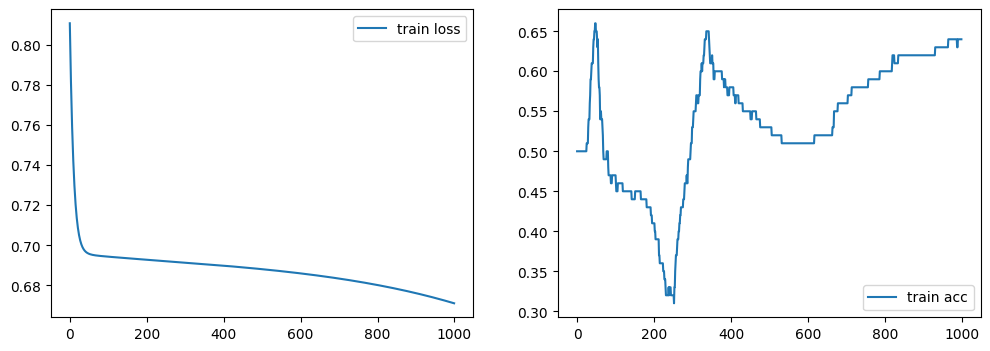

In [79]:
parameters = neural_network(X, y, 4)